## Demo for linear regresssion

looks at estimating the uncertainties on the best-fit intercept and slope, using 1) jackknife, 2) bootstrap, 3) standard expressions for standard deviations of the probability density function

In [110]:
%matplotlib inline

######## We need to import modules into python
# numpy is basic number crunching
import numpy as np
# need a generator for random integers
from random import randint,gauss,seed
# matplolib is plotting module
import matplotlib.pyplot as plt
###################

This generates some trial data, with deliberately added noise. This is to help understand the principles of linear regression. In practice, you will typically read your data in from a file.

I use 'seed' so data generated is the same each time it runs.

In [111]:
# this starts random number generator at same point each time
seed(981181)
# now generate data that is in fact a straight line plus noise
n_pts=10
print('data has ',n_pts,' points')
x=np.linspace(0.5,25,n_pts)
y=np.zeros(n_pts)
# actual intercept
real_intercept=1.3
real_slope=2.2
# gauss introduces Gaussian distributed noise of std deviation epsilon_noise
epsilon_noise=1.9
for i in range(0,n_pts):
    y[i]=real_intercept+real_slope*x[i]+gauss(0.0,epsilon_noise)

data has  10  points


define function to fit straight line y = m*x + c to data - arrays x and y

In [112]:
def linear_fit_calc(xf,yf):
    n_ptsf=len(xf)
# mean values
    mean_xf=np.sum(xf)/n_ptsf
    mean_yf=np.sum(yf)/n_ptsf
# first calculate arrays of x minus its mean value
    delta_xf=xf-mean_xf
    delta_yf=yf-mean_yf
# now for best-fit slope m
    m=np.sum(delta_xf*delta_yf)/np.sum(delta_xf**2)
# and best-fit intercept
    c=mean_yf-m*mean_xf
    return m,c

In [113]:
# a straight line of form y = intercept + slope*x is polynomial of order 1
# can change 1 to 2 to fit quadratic polynomial
#slope, intercept =np.polyfit(x,y,1)
slope,intercept=linear_fit_calc(x,y)
print('best fit value of intercept ','%6.3f'%(intercept),' from least squares fitting')
print('best fit value of slope ','%6.3f'%(slope))

best fit value of intercept   2.558  from least squares fitting
best fit value of slope   2.130


Cell below defines functions for jackknife error estimate


In [114]:
"""
Jackknife error estimates for intercept and slope
for linear regression
RPS June 2018
"""
def jackknife_calc():
# there will be n_pts fits to all possible sets of (n_pts-1) data points
    slope_jack=np.zeros(n_pts)
    intercept_jack=np.zeros(n_pts)
    for i in range(0,n_pts):
# first select each set of (n_pts-1) taken from our data
# which is a set if n_pts, by droping 1 of these points
        x_jack=np.zeros(n_pts-1)
        y_jack=np.zeros(n_pts-1)
        j_jack=0
        for j in range(0,n_pts):
            if(i !=j):
                x_jack[j_jack]=x[j]
                y_jack[j_jack]=y[j]
                j_jack=j_jack+1
# now fit to this set of (n_pts-1) points
        slope_jack[i],intercept_jack[i]=linear_fit_calc(x_jack,y_jack)#np.polyfit(x_jack,y_jack,1)
# now find smallest and largest values of n_pts fits
    min_intercept_jack=np.min(intercept_jack)
    max_intercept_jack=np.max(intercept_jack)
    min_slope_jack=np.min(slope_jack)
    max_slope_jack=np.max(slope_jack)
    return min_intercept_jack,max_intercept_jack,min_slope_jack,max_slope_jack

having defined jackknife function, now use it to obtain estimate of error

In [115]:
# jackknife
print('')
print('now calculate Jackknife uncertainties on intercept & slope')
min_intercept_jack,max_intercept_jack,min_slope_jack,max_slope_jack=jackknife_calc()
print('best fit value of intercept    ','%9.2f'%(intercept))
print('min & max jacknife intercepts ','%5.2f'%(min_intercept_jack),' to ','%5.2f'%(max_intercept_jack))
print('best fit value of slope    ','%9.2f'%(slope))
print('min & max jacknife slopes ','%5.2f'%(min_slope_jack),' to ','%5.2f'%(max_slope_jack))


now calculate Jackknife uncertainties on intercept & slope
best fit value of intercept          2.56
min & max jacknife intercepts   1.97  to   3.23
best fit value of slope          2.13
min & max jacknife slopes   2.09  to   2.15


So, if instead of having n_pts  we had only had 1 less of them, then we'd expect intercepts and slopes in the ranges shown above - these ranges are therefore reasonable estimates of errors

Now do boostrap error analysis, first define a function to do this

In [116]:
def bootstrap_calc():
    n_bootstrap=100
    slope_boot=np.zeros(n_bootstrap)
    intercept_boot=np.zeros(n_bootstrap)
    for i in range(0,n_bootstrap):
        x_boot=np.zeros(n_pts)
        y_boot=np.zeros(n_pts)
        for j in range(0,n_pts):
            i_sample=randint(0,n_pts-1)
            x_boot[j]=x[i_sample]
            y_boot[j]=y[i_sample]
        slope_boot[i],intercept_boot[i]=linear_fit_calc(x_boot,y_boot)#np.polyfit(x_boot,y_boot,1)
# sort so later we pick out values near bottom and top
    intercept_boot=np.sort(intercept_boot)
    slope_boot=np.sort(slope_boot)
# 95% level confidence - 95% is just a reasonable but basically arbitrary choice
    n_boot_lower_conf=int(float(n_bootstrap)*0.05)
    n_boot_upper_conf=int(float(n_bootstrap)*0.95)
    min_intercept_boot=intercept_boot[n_boot_lower_conf]
    max_intercept_boot=intercept_boot[n_boot_upper_conf]
    min_slope_boot=slope_boot[n_boot_lower_conf]
    max_slope_boot=slope_boot[n_boot_upper_conf]
    return min_intercept_boot,max_intercept_boot,min_slope_boot,max_slope_boot
#########################

Now call this function to get the results

In [117]:

# Bootstrap estimates for statistical error bounds
min_intercept_boot,max_intercept_boot,min_slope_boot,max_slope_boot=bootstrap_calc()
print('')
print('after boootstrap error analysis the data constrains the fit parameters to ranges:')
print('best fit value of intercept ','%5.2f'%(intercept),
      ' 95% conf. range ','%5.2f'%(min_intercept_boot),' to ','%5.2f'%(max_intercept_boot))
print('best fit value of slope ','%9.2f'%(slope),
      ' 95% conf. range ','%5.2f'%(min_slope_boot),' to ','%5.2f'%(max_slope_boot))


after boootstrap error analysis the data constrains the fit parameters to ranges:
best fit value of intercept   2.56  95% conf. range   1.02  to   3.92
best fit value of slope       2.13  95% conf. range   2.04  to   2.23


Now plot data, best-fit, plus 5% and 95% bootstrap estimates to give rough idea of lowest reasonable line and highest reasonable line

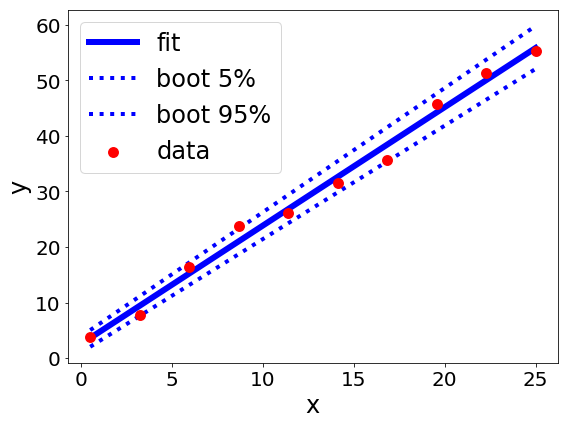

In [118]:
########### PLOT
# first generate points for fitted function
n_fitpts=10
x_fit=np.linspace(np.min(x),np.max(x),n_fitpts)
# this is the best fit
y_fit=intercept+slope*x_fit
# now for fit 5/100 lowest intercept & slope
y_fit_lower_conf=min_intercept_boot+min_slope_boot*x_fit
# now for fit 95/100 intercept & slope
y_fit_upper_conf=max_intercept_boot+max_slope_boot*x_fit
######### Now generate plot
plt.figure(figsize = (8,6) )
# plot data as scatter plot,
plt.scatter(x,y,s=120,c='red',linewidth=0,label='data',zorder=2)
# plot fitted function, zorder = 1 < 2 so line underneath points
plt.plot(x_fit,y_fit,linewidth=6,c='blue', label='fit',zorder=1)
# plot estimates of lower and upper 
plt.plot(x_fit,y_fit_lower_conf,linewidth=4,c='blue',linestyle=':',zorder=1,label='boot 5%')
plt.plot(x_fit,y_fit_upper_conf,linewidth=4,c='blue',linestyle=':',zorder=1,label='boot 95%')
plt.xlabel('x',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
#	plt.legend(loc='upper right')
#	plt.axhline(color = 'gray', zorder=-1)
# save plot to file
#plt.savefig('tmp.pdf')
# display plot on screen
#plt.show()

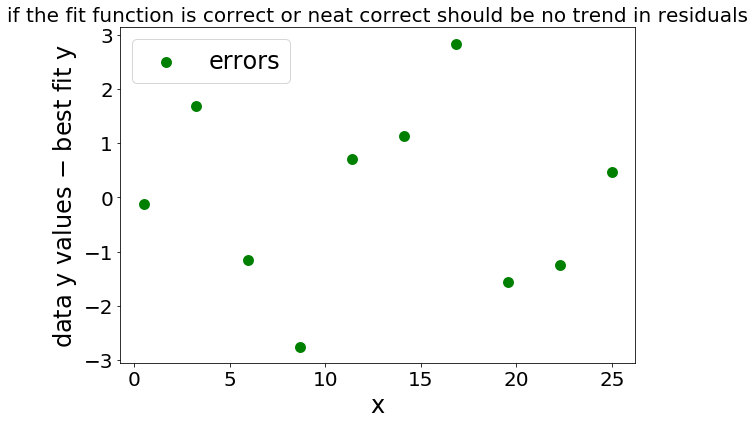

In [119]:
## plot errors to look for trend
######### Now generate plot
plt.figure(figsize = (10,6) )
# plot data as scatter plot,
plt.title('if the fit function is correct or neat correct should be no trend in residuals',fontsize=20)
# these are the error or residuals in y values
y_error=intercept+slope*x - y
plt.scatter(x,y_error,s=120,c='green',linewidth=0,label='errors',zorder=2)
plt.xlabel('x',fontsize=24)
plt.ylabel('data y values $-$ best fit y',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
plt.show()

In [120]:
"""
The formulas in std_errors() essentially assume that the best fit
slope and intercept have Gaussian probability density
distributions, and then the formulas below estimate the standard
deviations of these probability density distributions
NB For rather technical reasons there are various variants
in these formulas with n_pts and (n_pts-2)  - the 2 here
is the number of fit parameters (intercept and slope)
As these are just ESTIMATES and as n has to be >> 1
to get reliable results, in practice the difference between
n_pts and (n_pts-2) is not worth worrying
RPS June 2018  
"""
def std_errors():
    y_error=intercept+slope*x - y
    std_yerr=np.sqrt(np.sum(y_error**2)/(n_pts-2.0))
    mean_x=np.sum(x)/float(n_pts)
    std_error_slope=std_yerr/np.sqrt(np.sum((x-mean_x)**2))
    std_error_intercept=std_yerr*np.sqrt(np.sum(x**2)/(n_pts*np.sum((x-mean_x)**2)))
    return std_yerr,std_error_slope,std_error_intercept
############
def rsq_calc():
    mean_y=np.sum(y)/float(n_pts)
    variance_y=np.sum((y-mean_y)**2)/float(n_pts)
    y_error=intercept+slope*x - y
    mean_sq_yerr=np.sum(y_error**2)/float(n_pts)
    r_sq=1.0-mean_sq_yerr/variance_y
    return r_sq

In [121]:
std_yerr,std_error_slope,std_error_intercept=std_errors()
print('standard (rms) error in y values ','%5.2f'%(std_yerr))
print('std error estimate for slope ','%5.2f'%(std_error_slope))
print('std error estimate for intercept ','%5.2f'%(std_error_intercept))
r_sq=rsq_calc()
print('coefficient of determination R^2 ','%7.4f'%(r_sq))

standard (rms) error in y values   1.80
std error estimate for slope   0.07
std error estimate for intercept   1.09
coefficient of determination R^2   0.9908
